In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from itertools import chain

from protest_impact.data.protests.config import movement_keywords, treatment_keywords

protest_keywords = treatment_keywords["de"] + movement_keywords["climate"]["movement"]
topic_keywords = list(
    chain(*[movement_keywords["climate"][a] for a in ["topic", "framing", "goal"]])
)
protest_keywords, topic_keywords

(['protest*',
  'demo',
  'demonstr*',
  'kundgebung',
  'versamm*',
  'soziale bewegung',
  'hausbesetz*',
  'streik*',
  'unterschriften*',
  'petition',
  'hasskriminalität',
  'unruhen',
  'aufruhr',
  'aufstand',
  'rebell*',
  'blockade',
  'blockier*',
  'sitzblock*',
  'boykott*',
  'riot',
  'aktivis*',
  'bürgerinitiative',
  'bürgerbegehren',
  'marsch',
  'aufmarsch',
  'parade',
  'mahnwache',
  'hungerstreik',
  'ziviler ungehorsam',
  'fridays for future',
  'fridaysforfuture',
  'fridays4future',
  'extinction rebellion',
  'just stop oil',
  'letzte generation',
  'ultima generazione',
  'ende gelände',
  'klimabewegung',
  'klimaaktivis*',
  'klimastreik*'],
 ['klima',
  'klimawandel',
  'erderwärmung',
  'klimaschutz',
  'klimagerechtigkeit',
  'hambacher forst',
  'hambi',
  'lütz*',
  'klimakrise',
  'klimakatastrophe',
  'klimakollaps',
  'klimanotstand',
  'klimagerechtigkeit',
  'klimaneutralität',
  'klimaneutral',
  'klimaziel',
  'klimaschutzpaket',
  'klimas

In [3]:
_protest_query = " OR ".join(
    [f'"{a}"' if len(a.split()) > 1 else a for a in protest_keywords]
)
_topic_query = " OR ".join(
    [f'"{a}"' if len(a.split()) > 1 else a for a in topic_keywords]
)
protest_focused_query = f"({_topic_query}) AND ({_protest_query})"
topic_focused_query = f"({_topic_query}) AND NOT ({_protest_query})"
unfocused_query = _topic_query
unfocused_query, protest_focused_query, topic_focused_query

('klima OR klimawandel OR erderwärmung OR klimaschutz OR klimagerechtigkeit OR "hambacher forst" OR hambi OR lütz* OR klimakrise OR klimakatastrophe OR klimakollaps OR klimanotstand OR klimagerechtigkeit OR klimaneutralität OR klimaneutral OR klimaziel OR klimaschutzpaket OR klimaschutzgesetz* OR kohleausstieg OR "erneuerbare energie*"',
 '(klima OR klimawandel OR erderwärmung OR klimaschutz OR klimagerechtigkeit OR "hambacher forst" OR hambi OR lütz* OR klimakrise OR klimakatastrophe OR klimakollaps OR klimanotstand OR klimagerechtigkeit OR klimaneutralität OR klimaneutral OR klimaziel OR klimaschutzpaket OR klimaschutzgesetz* OR kohleausstieg OR "erneuerbare energie*") AND (protest* OR demo OR demonstr* OR kundgebung OR versamm* OR "soziale bewegung" OR hausbesetz* OR streik* OR unterschriften* OR petition OR hasskriminalität OR unruhen OR aufruhr OR aufstand OR rebell* OR blockade OR blockier* OR sitzblock* OR boykott* OR riot OR aktivis* OR bürgerinitiative OR bürgerbegehren OR mar

In [4]:
from protest_impact.data.protests import get_climate_protests

protests = get_climate_protests()

In [10]:
from protest_impact.synthetic_region import (
    evaluate_multiple_protests,
    metrics_from_multiple,
    models,
)


def evaluate(query, min_control_regions, model):
    return evaluate_multiple_protests(
        term=query,
        events=protests,
        co_terms=[],
        reference_events=protests,
        source="mediacloud",
        data_kwargs=dict(
            n_days_train=7 * 4 * 3,
            n_days_predict=7 * 4 * 3,
            n_days_protest_free_pre=1,
            n_days_protest_free_post=1,
            min_control_regions=min_control_regions,
            min_count=3,
        ),
        method_kwargs=dict(
            method=model,
        ),
    )

unfocused 1 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.30543306925206043, 'mse': 0.1698872427438976}


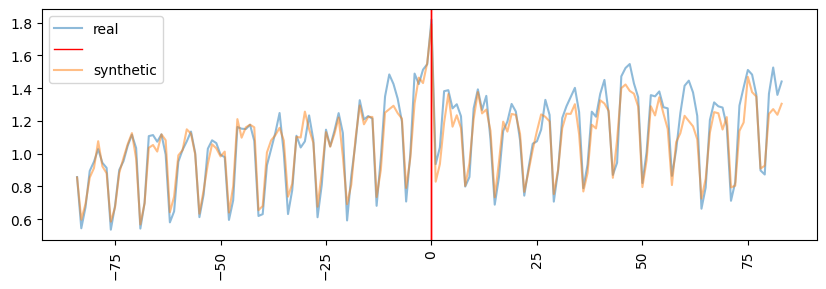

protest_focused 1 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.5856697678956382, 'mse': 0.7896411149534206}


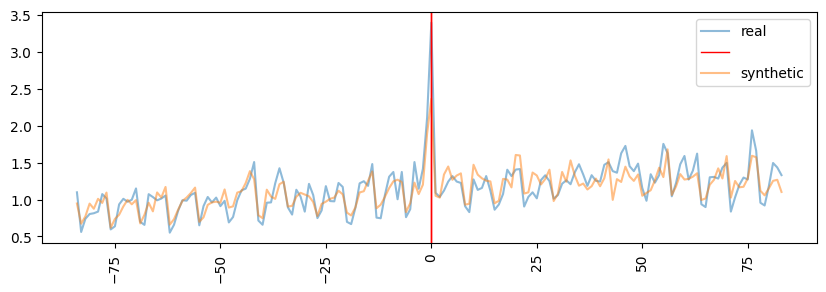

topic_focused 1 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.33631013271223514, 'mse': 0.20416995424615328}


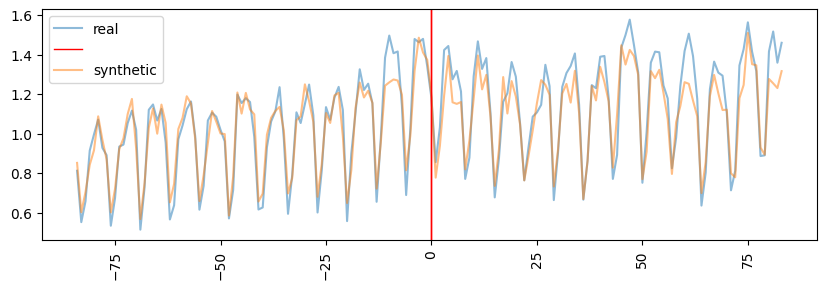

unfocused 3 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.29662302411291785, 'mse': 0.16458620489727432}


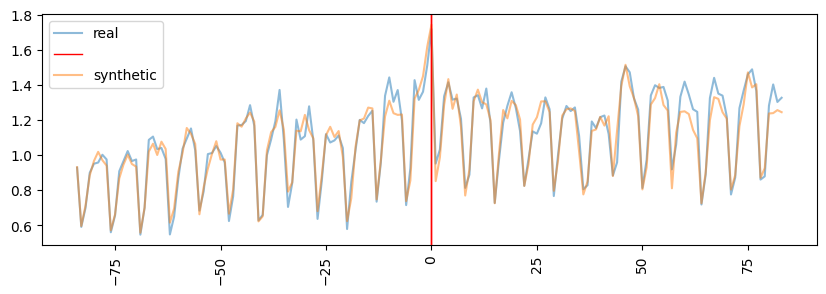

protest_focused 3 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.4805232342171755, 'mse': 0.555174429908175}


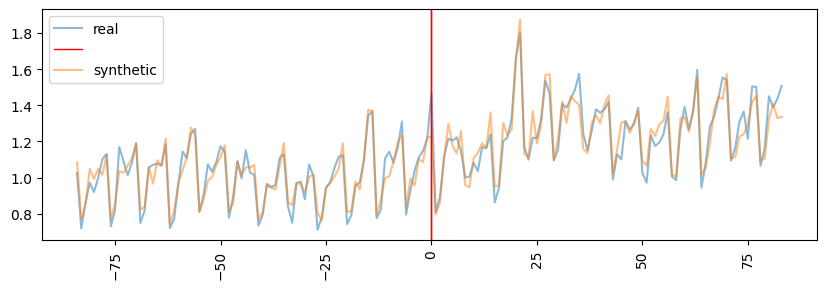

topic_focused 3 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.31095427255429253, 'mse': 0.18379462161935492}


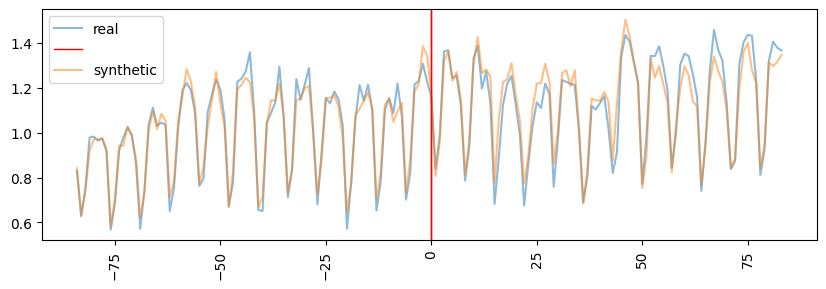

unfocused 5 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.2865280094019642, 'mse': 0.15932410394952745}


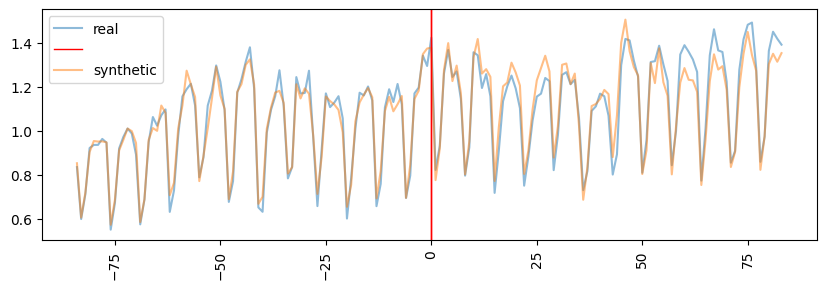

protest_focused 5 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.48667791626340745, 'mse': 0.5721463573808535}


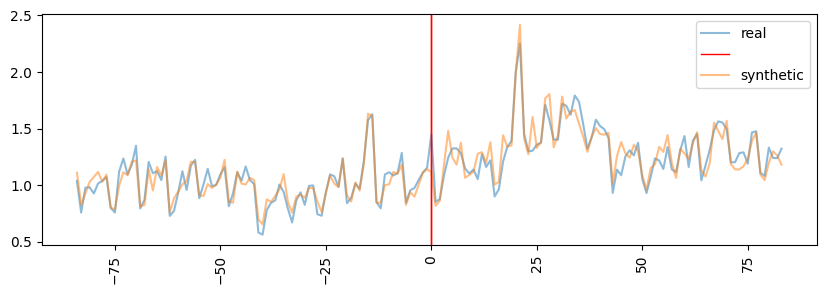

topic_focused 5 ridge


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.2935519040858951, 'mse': 0.16571982618841866}


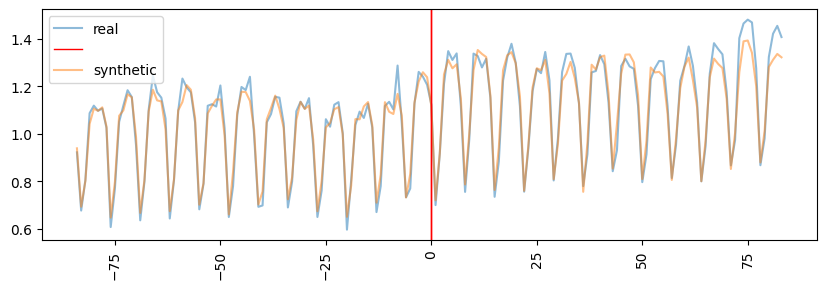

unfocused 1 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.3492028083714332, 'mse': 0.23325050337722472}


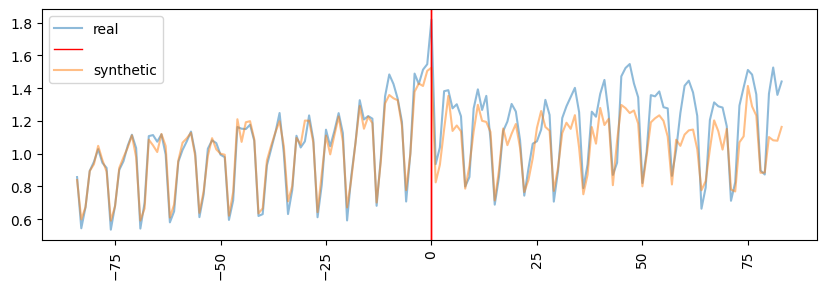

protest_focused 1 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.6571010867986343, 'mse': 1.1211254721201882}


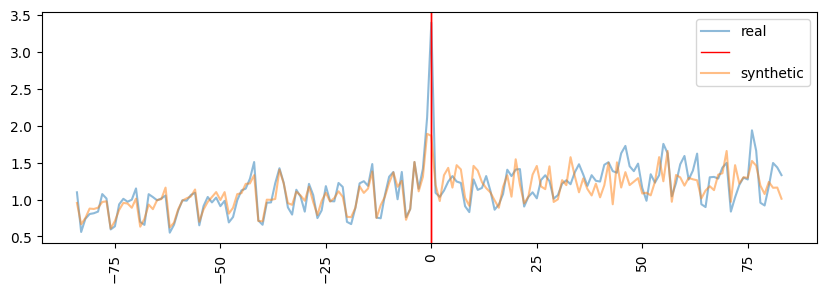

topic_focused 1 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.3896186021980634, 'mse': 0.28587477289263086}


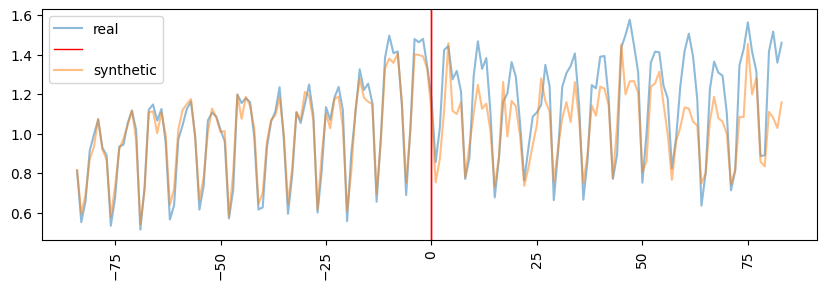

unfocused 3 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.33783272656811264, 'mse': 0.22545912631119366}


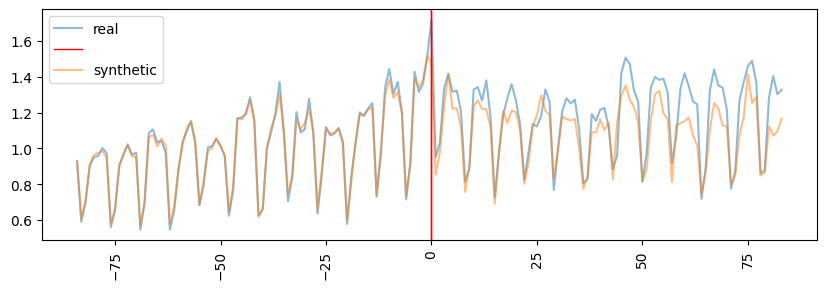

protest_focused 3 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.5195422981075275, 'mse': 0.7847031475240143}


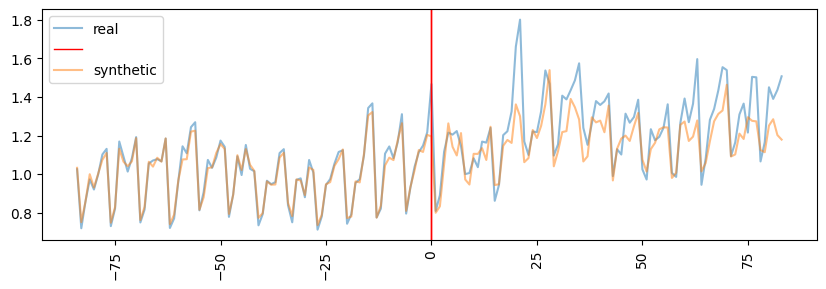

topic_focused 3 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.35078631269056443, 'mse': 0.2437612664722212}


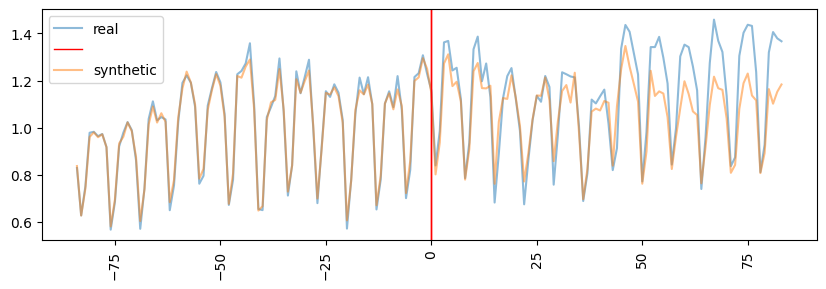

unfocused 5 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.32180704394565657, 'mse': 0.215256300240166}


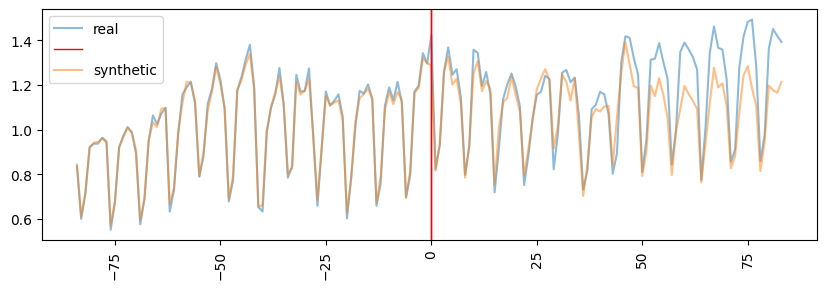

protest_focused 5 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.5112403209423488, 'mse': 0.7387271832319118}


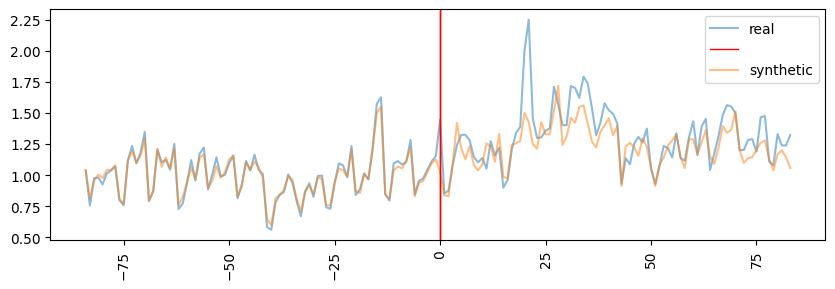

topic_focused 5 random_forest


  0%|          | 0/466 [00:00<?, ?it/s]

{'mae': 0.3380162935088291, 'mse': 0.23151958554507812}


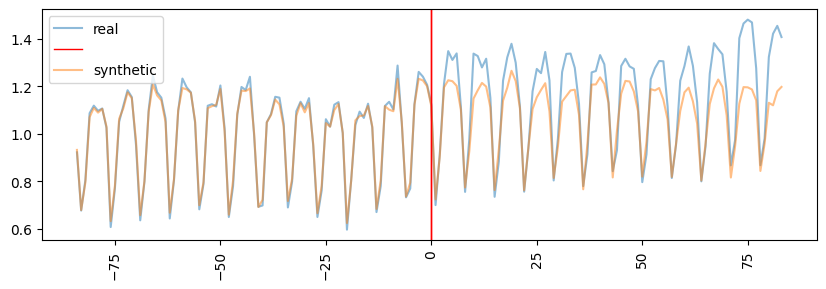

In [14]:
import matplotlib.pyplot as plt
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

# model_names = ["mean", "distance_weights", "ridge", "random_forest"]
model_names = ["ridge", "random_forest"]

results = {}
agg_dfs = {}
for model_name in model_names:
    for min_control_regions in [1, 3, 5]:
        for query_name, query in [
            ("unfocused", unfocused_query),
            ("protest_focused", protest_focused_query),
            ("topic_focused", topic_focused_query),
        ]:
            print(query_name, min_control_regions, model_name)
            result, agg_df = evaluate(query, min_control_regions, models[model_name])
            print(metrics_from_multiple(result, protest_date=0))
            plot_comparison(agg_df, protest_date=0)
            plt.show()
            results[(query_name, min_control_regions, model_name)] = result
            agg_dfs[(query_name, min_control_regions, model_name)] = agg_df

unfocused 5 mean
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


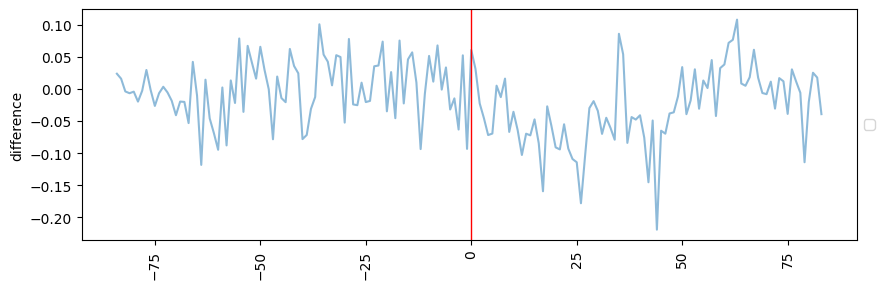

protest_focused 5 mean
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


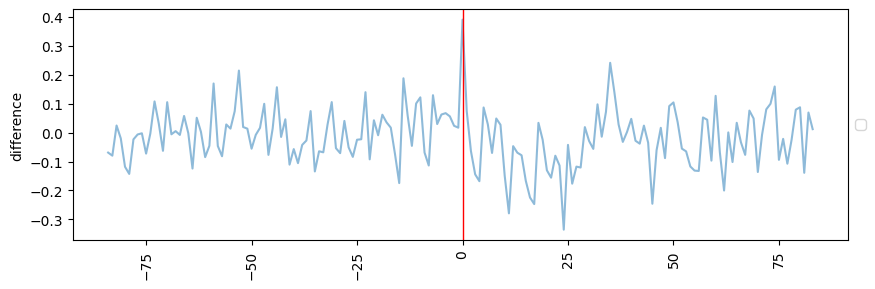

topic_focused 5 mean
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


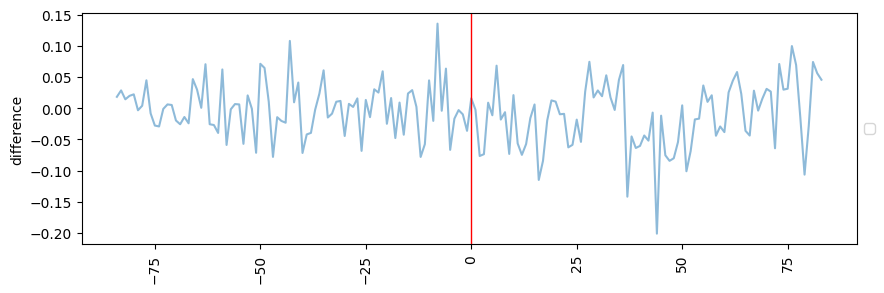

unfocused 5 distance_weights
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


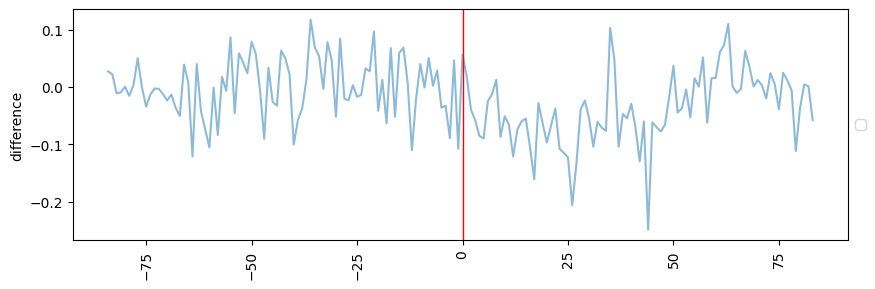

protest_focused 5 distance_weights
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


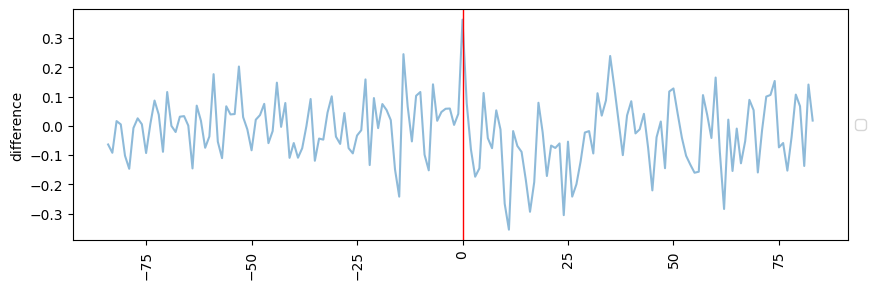

topic_focused 5 distance_weights
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


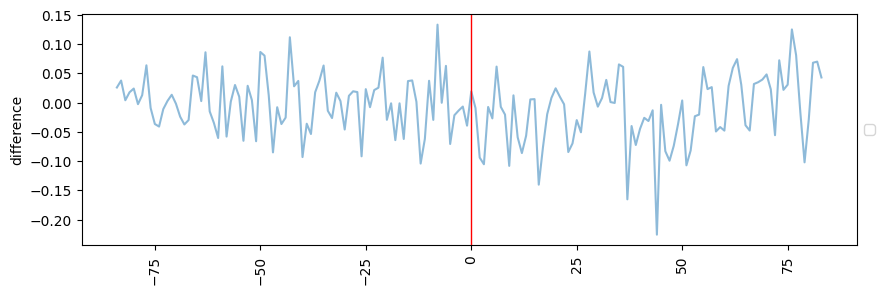

unfocused 5 ridge
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


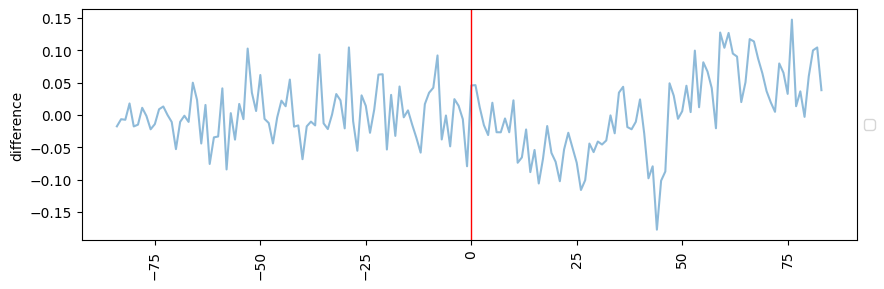

protest_focused 5 ridge
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


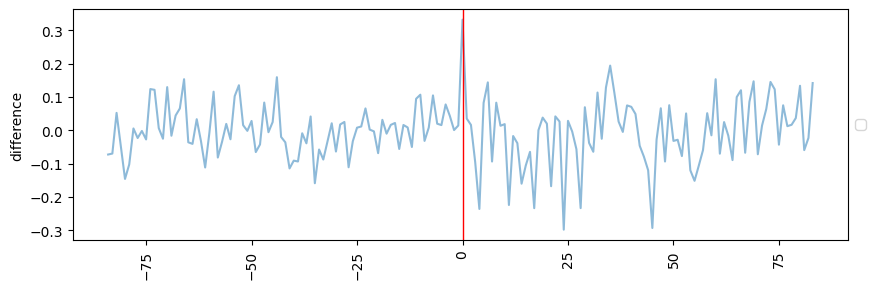

topic_focused 5 ridge
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


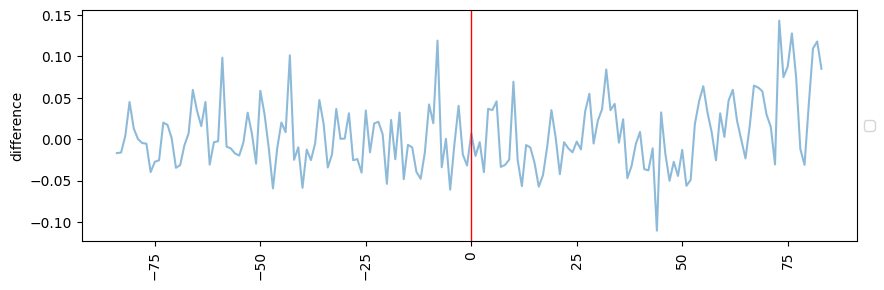

unfocused 5 random_forest
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


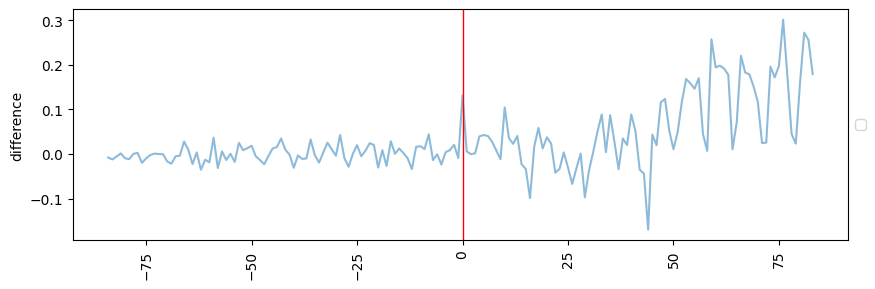

protest_focused 5 random_forest
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


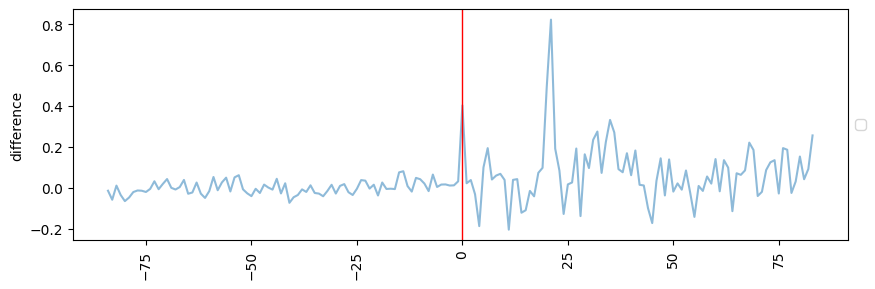

topic_focused 5 random_forest
{'mae': 0.3365906511051338, 'mse': 0.23055155060004745}


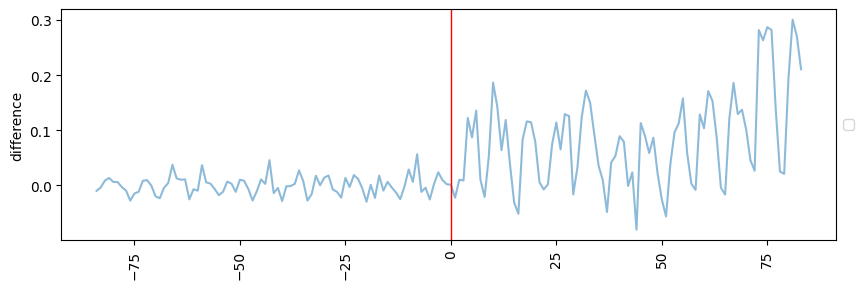

In [9]:
import matplotlib.pyplot as plt
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

model_names = ["mean", "distance_weights", "ridge", "random_forest"]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for model_name in model_names:
    for query_name, query in [
        ("unfocused", unfocused_query),
        ("protest_focused", protest_focused_query),
        ("topic_focused", topic_focused_query),
    ]:
        print(query_name, min_control_regions, model_name)
        agg_df = agg_dfs[(query_name, min_control_regions, model_name)]
        print(metrics_from_multiple(result, protest_date=0))
        plot_difference(agg_df, protest_date=0)
        plt.show()

unfocused 1 mean


  0%|          | 0/466 [00:00<?, ?it/s]

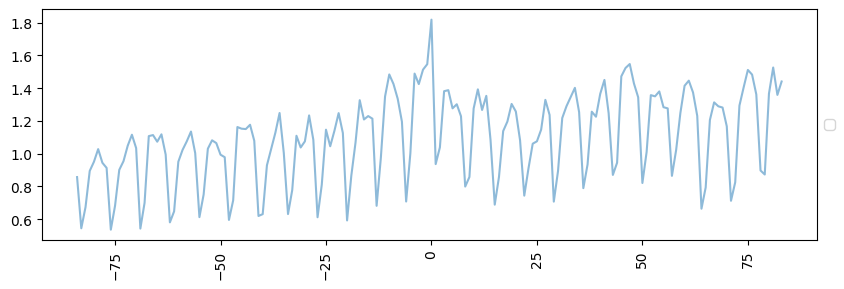

protest_focused 1 mean


  0%|          | 0/466 [00:00<?, ?it/s]

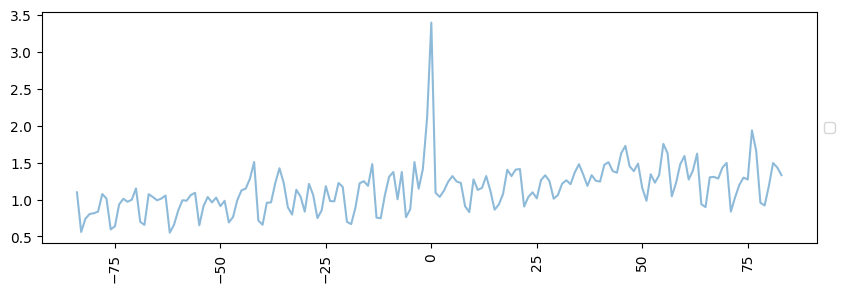

topic_focused 1 mean


  0%|          | 0/466 [00:00<?, ?it/s]

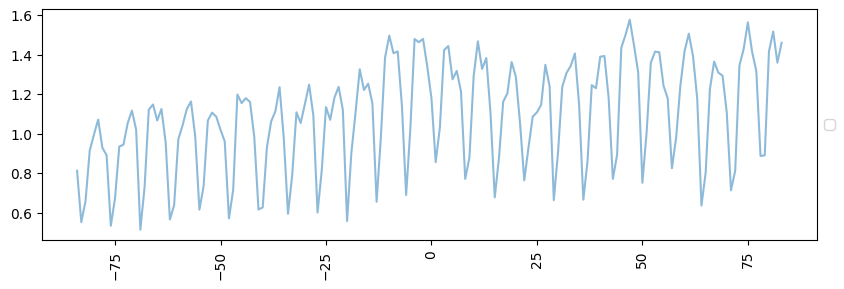

unfocused 3 mean


  0%|          | 0/466 [00:00<?, ?it/s]

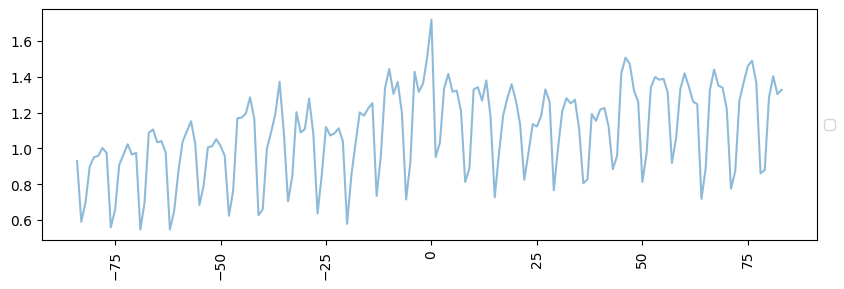

protest_focused 3 mean


  0%|          | 0/466 [00:00<?, ?it/s]

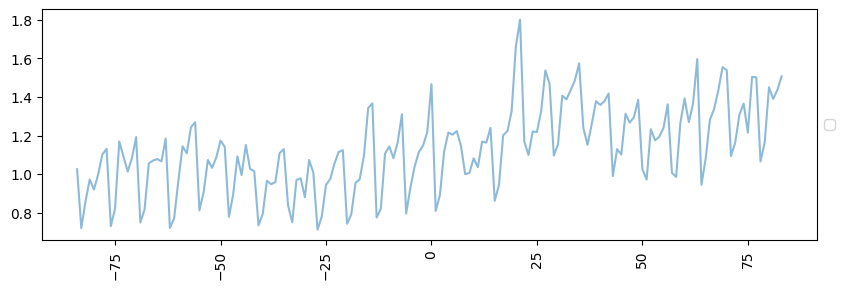

topic_focused 3 mean


  0%|          | 0/466 [00:00<?, ?it/s]

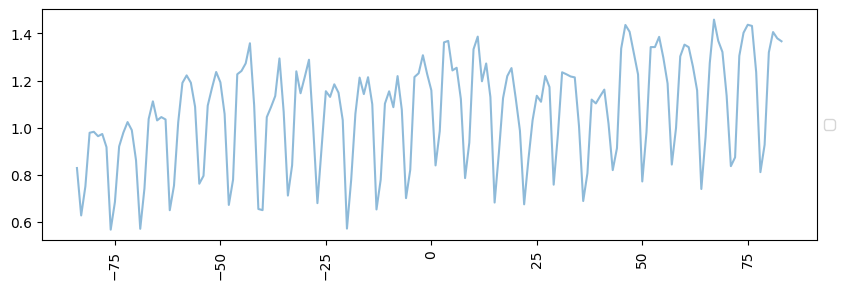

In [11]:
import matplotlib.pyplot as plt
from protest_impact.data.discourse.visual import (
    plot_comparison,
    plot_coverage_sequence,
    plot_difference,
)

model_names = ["mean", "distance_weights", "ridge", "random_forest"]

results = {}
agg_dfs = {}
for model_name in model_names[:1]:
    for min_control_regions in [1, 3]:
        for query_name, query in [
            ("unfocused", unfocused_query),
            ("protest_focused", protest_focused_query),
            ("topic_focused", topic_focused_query),
        ]:
            print(query_name, min_control_regions, model_name)
            result, agg_df = evaluate(query, min_control_regions, models[model_name])
            plot_coverage_sequence(agg_df.rename(columns={"real": "count"}))
            plt.show()
            results[(query_name, min_control_regions, model_name)] = result
            agg_dfs[(query_name, min_control_regions, model_name)] = agg_df